# Applications de la réduction

## Système linéaire

Résoudre le système linéaire défini par
$$X_0\in\mathrm{M}_{4,1}(\mathbb{R})\quad\text{et}\quad \forall n\in\mathbb{N},\; X_{n+1}=\left[\begin{matrix}1 & -2 & 3 & 4\\-2 & 1 & -9 & -15\\-3 & 3 & -22 & -37\\2 & -1 & 14 & 24\end{matrix}\right]\cdot X_n$$

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
A = sp.Matrix([[1, -2, 3, 4], [-2, 1, -9, -15],
              [-3, 3, -22, -37], [2, -1, 14, 24]])

**Question 1**

Cela revient à calculer $A^n$. Diagonalisons ou trigonalisons.

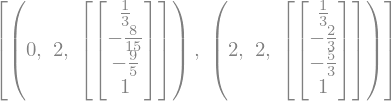

In [3]:
A.eigenvects()

Aïe ! La matrice n'est pas diagonalisable (2 est de multiplicité 2 et son espace propre est de dimension 1). *Trigonalisons !*

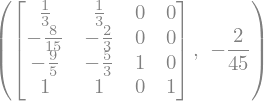

In [4]:
P = sp.eye(4)
P[:, 0] = _[0][2][0]
P[:, 1] = _[1][2][0]
P, P.det()

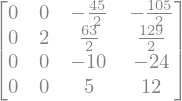

In [5]:
P.inv()@A@P

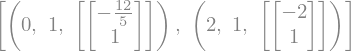

In [6]:
_[2:, 2:].eigenvects()

In [7]:
C1 = P[:, 2]
C2 = P[:, 3]
P[:, 2] = -sp.S(12)/5*C1+C2
P[:, 3] = -2*C1+C2

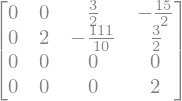

In [8]:
T = P.inv()@A@P
T

Le reste se fait à la main. Posons
$$X_0=\begin{bmatrix}a_0\\ b_0\\ c_0\\ d_0\end{bmatrix}\quad\text{et}\quad\forall n\in\mathbb{N},\;X_n=\begin{bmatrix} a_n\\ b_n\\ c_n\\ d_n\end{bmatrix},\text{ puis } Y_n=P^{-1}.\cdot X_n=\begin{bmatrix} x_n\\ y_n\\ z_n\\ t_n\end{bmatrix}$$

In [9]:
a0, b0, c0, d0 = sp.symbols(
    'a_0 b_0 c_0 d_0', real=True)
x, y, z, t = sp.symbols('x y z t', cls=sp.Function)
n = sp.symbols('n', integer=True, nonnegative=True)

In [10]:
# À cause de la ligne nulle, on ne peut pas déduire z_1 à partir de z_0, il faut donc commencer à 1
X0 = sp.Matrix([a0, b0, c0, d0])
X1 = A@X0
Y1 = P.inv()@X1

In [11]:
def Y(n):
    return sp.Matrix([x(n), y(n), z(n), t(n)])

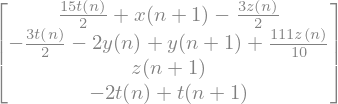

In [12]:
Y(n+1)-T@Y(n)

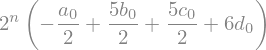

In [13]:
res = _
sp.rsolve(res[3, 0], t(n), {t(1): Y1[3, 0]})

In [14]:
tn = _
sp.rsolve(res[2, 0], z(n), {z(1): Y1[2, 0]})

In [15]:
zn = _
sp.rsolve(res[1, 0].subs({z(n): zn, t(n): tn}), y(n), {y(1): Y1[1, 0]})

AttributeError: 'NoneType' object has no attribute 'subs'

Fasions le calcul à la main, en cherchant une solution sous la forme
$$y_n=\alpha\,n\,2^n$$

In [16]:
alpha, beta = sp.symbols('\\alpha \\beta', real=True)

In [17]:
res[1, 0].subs({z(n): zn, t(n): tn}).subs(
    {y(n+1): alpha*(n+1)*2**(n+1), y(n): alpha*n*2**n}).simplify()

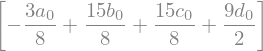

In [18]:
sp.solve(_, alpha)

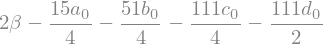

In [19]:
# Pour tenir compte de la condition initiale, ne pas oublier la solution de l'équation homogène
yn = (_[0]*n+beta)*2**n
yn.subs({n: 1})-Y1[1, 0]

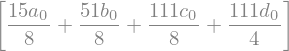

In [20]:
sp.solve(_, beta)

In [21]:
yn = yn.subs({beta: _[0]}).simplify()

In [22]:
sp.rsolve(res[0, 0].subs({z(n): zn, t(n): tn}), x(n), {x(1): Y1[0, 0]})

AttributeError: 'NoneType' object has no attribute 'subs'

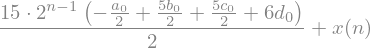

In [23]:
res[0, 0].subs({t(n): tn, z(n): zn}).subs({n: n-1})

In [24]:
sp.solve(_, x(n))

In [25]:
xn = _[0]

In [26]:
Xn = P@sp.Matrix([xn, yn, zn, tn]).applyfunc(sp.expand).applyfunc(sp.simplify)

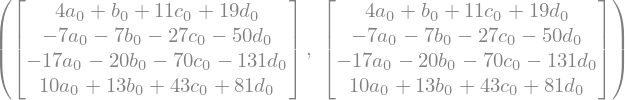

In [27]:
Xn.subs({n: 2}), A@X1

On trouve finalement

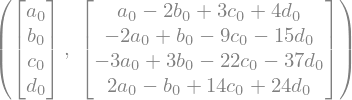

In [28]:
X0, X1

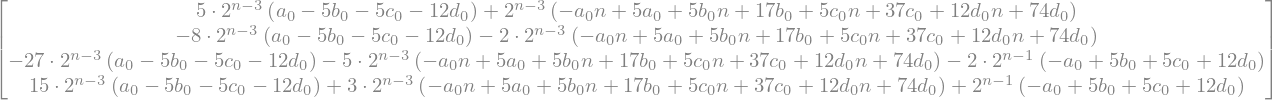

In [29]:
# Pour n>=2
Xn

In [30]:
An = sp.Matrix([_.subs({a0: 1, b0: 0, c0: 0, d0: 0}), _.subs({a0: 0, b0: 1, c0: 0, d0: 0}), _.subs(
    {a0: 0, b0: 0, c0: 1, d0: 0}), _.subs({a0: 0, b0: 0, c0: 0, d0: 1})]).reshape(4, 4).transpose()

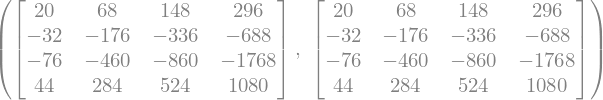

In [31]:
An.subs({n: 5}), A@A@A@A@A

## Système différentiel

1. Résoudre l'équation différentielle
$$y^{(4)}+2\,y^{(3)}-3\,y''-4\,y'+4\,y=2\,\sinh(2\,x)-x\,\cosh(x)$$
1. Résoudre par une méthode de variation des 4 constantes
$$y^{(4)}+2\,y^{(3)}-3\,y''-4\,y'+4\,y=f(x)$$
où $f$ est une fonction continue donnée.

**Question 1**

On commence par résoudre l'équation homogène.
$$y^{(4)}+2\,y^{(3)}-3\,y''-4\,y'+4\,y=0$$
Son équation caractéristique est 
$$\lambda^4+2\,\lambda^3-3\,\lambda^2-4\,\lambda+4=0$$

In [32]:
l = sp.symbols('\\lambda')
eq = l**4+2*l**3-3*l**2-4*l+4
eq.factor()

On obtient dont
$$\mathrm{Sol}(\mathcal{H})=\mathrm{Vect}\left\{\left(x\longmapsto e^x,\; x\longmapsto x\,e^x,\; x\longmapsto e^{-2\,x},\;x\longmapsto x\,e^{-2\,x}\right)\right\}$$

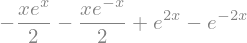

In [33]:
x = sp.symbols('x', real=True)
(2*sp.sinh(2*x)-x*sp.cosh(x)).rewrite(sp.exp).expand()

Par principe de superposition des solutions, on cherche une solution particulière pour les 4 termes.
1. $-x\,e^x/2$ : on cherche sous la forme $\left(a\,x^3+b\,x^2\right)\,e^x$
1. $-x\,e^{-x}/2$ : on cherche une solution sous la forme $\left(a\,x+b\right)\,e^{-x}$
1. $e^{2\,x}$ : on cherche une solution sous la forme $a\, e^{2\,x}$
1. $-e^{-2\,x}$ : on cherche une solution sous la forme $\left(a\,x^2+b\,x\right)\,e^{-2\,x}$

In [34]:
# Premier terme
y = sp.Function('y')
ed = y(x).diff(x, 4)+2*y(x).diff(x, 3)-3*y(x).diff(x, 2)-4*y(x).diff(x)+4*y(x)

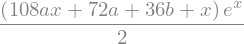

In [35]:
a, b, c, d = sp.symbols('a b c d', real=True)
(ed+x*sp.exp(x)/2).subs({y(x): (a*x**3+b*x**2)
                         * sp.exp(x)}).doit().expand().simplify()

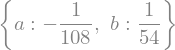

In [36]:
res = (_/sp.exp(x)).simplify()
sp.solve([res.coeff(x, 1), res.coeff(x, 0)], [a, b])

In [37]:
y1 = ((a*x**3+b*x**2)*sp.exp(x)).subs(_)

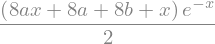

In [38]:
# Deuxième terme
(ed+x*sp.exp(-x)/2).subs({y(x): (a*x+b)*sp.exp(-x)}).doit().expand().simplify()

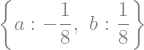

In [39]:
res = (_/sp.exp(-x)).simplify()
sp.solve([res.coeff(x, 1), res.coeff(x, 0)], [a, b])

In [40]:
y2 = ((a*x+b)*sp.exp(-x)).subs(_)

In [41]:
# Troisième terme
(ed-sp.exp(2*x)).subs({y(x): a*sp.exp(2*x)}).doit().expand().simplify()

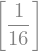

In [42]:
res = (_/sp.exp(2*x)).simplify()
sp.solve(res, a)

In [43]:
y3 = (a*sp.exp(2*x)).subs({a: _[0]})

In [44]:
# Quatrième terme
(ed+sp.exp(-2*x)).subs({y(x): (a*x**3+b*x**2)
                        * sp.exp(-2*x)}).doit().expand().simplify()

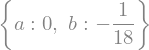

In [45]:
res = (_/sp.exp(-2*x)).simplify()
sp.solve([res.coeff(x, 1), res.coeff(x, 0)], [a, b])

In [46]:
y4 = ((a*x**3+b*x**2)*sp.exp(-2*x)).subs(_)

In [47]:
# La solution générale
sol = (a*x+b)*sp.exp(x)+(c*x+d)*sp.exp(-2*x)+y1+y2+y3+y4

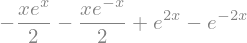

In [48]:
ed.subs({y(x): sol}).doit().expand()

**Question 2**

On vectorialise, en posant
$$Y(x)=\begin{bmatrix} y(x)\\ y'(x)\\ y''(x)\\ y^{(3)}(x)\end{bmatrix}$$
L'équation devient alors
$$Y'(x)=\begin{bmatrix} 0&1&0&0\\ 0&0&1&0\\ 0&0&0&1\\ -4&4&3&-3\end{bmatrix}\cdot Y(x)$$
et on applique la méthode de variation des constantes qui consiste à résoudre
$$M(x)\cdot\Lambda'(x)=\begin{bmatrix}0\\ 0\\ 0\\ f(x)\end{bmatrix}$$
où 
$$M(x)=\begin{bmatrix} \alpha_1(x)&\alpha_2(x)&\alpha_3(x)&\alpha_4(x)\\ \vdots&\vdots&\vdots&\vdots\\ \alpha_1^{(3)}(x)&\alpha_2^{(3)}(x)&\alpha_3^{(3)}(x)&\alpha_4^{(3)}(x)\end{bmatrix}$$
où $\alpha_1(x)=x\,e^x,\; \alpha_2(x)=e^x,\; \alpha_3(x)=x\,e^{-2\,x},\;\alpha_4(x)=e^{-2\,x}$

In [49]:
A = sp.Matrix([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [-4, 4, 3, -3]])

In [50]:
base = sp.Matrix([x*sp.exp(x), sp.exp(x), x*sp.exp(-2*x), sp.exp(-2*x)])
M = sp.Matrix([base, base.diff(x), base.diff(x, 2), base.diff(x, 3)]).reshape(4, 4)

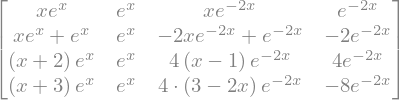

In [51]:
M

In [52]:
f = sp.Function('f')
B = sp.Matrix([0, 0, 0, f(x)])

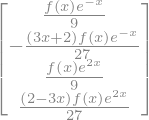

In [53]:
(M.inv()@B).applyfunc(sp.simplify)

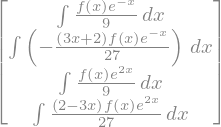

In [54]:
_.applyfunc(lambda t: sp.Integral(t))

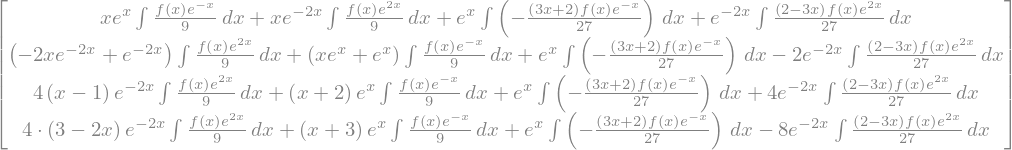

In [55]:
M@_

In [56]:
# La solution est sur la première ligne
sol = _[0, 0]

In [57]:
# Vérification
ed.subs({y(x): sol}).doit().simplify()